<a href="https://colab.research.google.com/github/iotanalytics/IoTTutorial/blob/main/code/prediction/Mini_Batch_Mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mini Batch Mean

## Introduction

K-means is one of the most popular clustering algorithms, mainly because of its good time performance. With the increasing size of the datasets being analyzed, the computation time of K-means increases because of its constraint of needing the whole dataset in main memory. For this reason, several methods have been proposed to reduce the temporal and spatial cost of the algorithm. A different approach is the Mini batch K-means algorithm.

Mini Batch K-means algorithm‘s main idea is to use small random batches of data of a fixed size, so they can be stored in memory. Each iteration a new random sample from the dataset is obtained and used to update the clusters and this is repeated until convergence. Each mini batch updates the clusters using a convex combination of the values of the prototypes and the data, applying a learning rate that decreases with the number of iterations. This learning rate is the inverse of the number of data assigned to a cluster during the process. As the number of iterations increases, the effect of new data is reduced, so convergence can be detected when no changes in the clusters occur in several consecutive iterations.
The empirical results suggest that it can obtain a substantial saving of computational time at the expense of some loss of cluster quality, but not extensive study of the algorithm has been done to measure how the characteristics of the datasets, such as the number of clusters or its size, affect the partition quality.

## Code Example

In [4]:
import pandas as pd
## example data importing
data = pd.read_csv('https://raw.githubusercontent.com/iotanalytics/IoTTutorial/main/data/SCG_data.csv').drop('Unnamed: 0',1).to_numpy()

Number of examples in training set =  450
Number of examples in testing set =  50


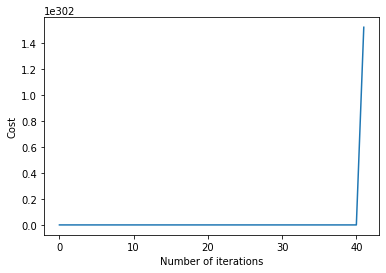

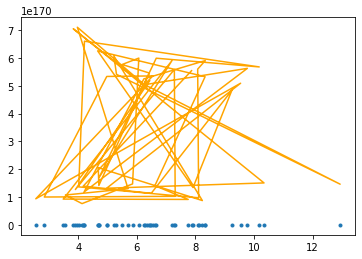

Mean absolute error =  3.5550522827115063e+170


In [13]:
import numpy as np 
import matplotlib.pyplot as plt

import operator

# train-test-split 

#print(data[0:10])
split_factor = 0.90
split = int(split_factor * data.shape[0]) 
  
X_train = data[:split, :1000] 
y_train = data[:split, -4].reshape((-1, 1)) 
X_test = data[split:, :1000] 
y_test = data[split:, -4].reshape((-1, 1)) 

print("Number of examples in training set = % d"%(X_train.shape[0])) 
print("Number of examples in testing set = % d"%(X_test.shape[0])) 

# linear regression using "mini-batch" gradient descent 
# function to compute hypothesis / predictions 
def hypothesis(X, theta): 
    return np.dot(X, theta) 
  
# function to compute gradient of error function w.r.t. theta 
def gradient(X, y, theta): 
    h = hypothesis(X, theta) 
    grad = np.dot(X.transpose(), (h - y)) 
    return grad 
  
# function to compute the error for current values of theta 
def cost(X, y, theta): 
    h = hypothesis(X, theta) 
    J = np.dot((h - y).transpose(), (h - y)) 
    J /= 2
    return J[0] 
  
# function to create a list containing mini-batches 
def create_mini_batches(X, y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 
  
# function to perform mini-batch gradient descent 
def gradientDescent(X, y, learning_rate = 0.001, batch_size = 32): 
    theta = np.zeros((X.shape[1], 1)) 
    error_list = [] 
    max_iters = 3
    for itr in range(max_iters): 
        mini_batches = create_mini_batches(X, y, batch_size) 
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch 
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta) 
            error_list.append(cost(X_mini, y_mini, theta)) 
  
    return theta, error_list 

#parameters get: for influx streaming seismic data; gen: for generating data
# data=create_data('get')

theta, error_list = gradientDescent(X_train, y_train) 
# print("Bias = ", theta[0]) 
# print("Coefficients = ", theta[1:]) 

# visualising gradient descent 
plt.plot(error_list) 
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show() 

# predicting output for X_test 
y_pred = hypothesis(X_test, theta) 
plt.scatter(X_test[:, 1], y_test[:, ], marker = '.') 
plt.plot(X_test[:, 1], y_pred, color = 'orange') 
plt.show() 
  
# calculating error in predictions 
error = np.sum(np.abs(y_test - y_pred) / y_test.shape[0]) 
print("Mean absolute error = ", error)

## Discussion
Pros:
*   Easily fits in the memory.
*   It is computationally efficient.
*   If stuck in local minimums, some noisy steps can lead the way out of them
*   Average of the training samples produces stable error gradients and convergence.

Cons
*   Low final accuracy: Many times mini batching may result in low final accuracy since the noise in the gradient is really helpful towards the end to extract that last 0.5%.